# 1. Rede Neural Preditiva 

In [17]:
import random

def transformarSaida(saida):
    pp=saida
    
#     pp[0]=saida[0]*180
#     pp[1]=saida[1]*180
#     pp[2]=saida[2]*180
#     pp[3]=saida[3]*180
#     pp[4]=saida[4]*180
#     pp[5]=saida[5]*180
#     pp[6]=saida[6]*180
#     pp[7]=saida[7]*180
#     pp[8]=saida[8]*180
#     pp[9]=saida[9]*180
#     pp[10]=saida[10]*180
#     pp[11]=saida[11]*180
    
#     pp[12]=saida[12]*60 -30
#     pp[13]=saida[13]*60 -30
#     pp[14]=saida[15]*60 -30
    
#     pp[15]=saida[15]*20 -10
#     pp[16]=saida[16]*20 -10
#     pp[17]=saida[17]*20 -10    

#     pp[18]=saida[18]*100   
    
#     pp[19]=saida[19]*100
    
#     pp[20]=saida[20]*360-180  
#     pp[21]=saida[21]*360-180
#     pp[22]=saida[22]*360-180
    
    pp[0]=saida[0]*360-180  
    pp[1]=saida[1]*360-180
#     pp[2]=saida[2]*360-180  
    
    return pp

## 1.1 Ler, tratar e organizar os dados de treinamento

In [18]:
import torch, torchvision
import numpy as np
import time
def buscaLinha(arq,i):
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            if(cont==i):
                linha=linha.replace("{","") #retira a chave da linha
                linha=linha.replace("}","")# retira a chave da linha
                return linha
def tratarX(x):
    xLista=[]
    xTratado=x.split()
    cont=0
    
    for k in xTratado:
        if(cont>2):
            xLista.append(k)
        cont=cont+2
    
    linhaString=""
    
    for k in xLista:
        linhaString=linhaString+k+" "
    return linhaString
    
    
def gerarDadosTrain(arq):#Cria dados de treinamento xTrain e yTrain a partir de um arquivo
    xTrain=[]
    yTrain=[]
    arq1 = open(arq)#abre o arquivo
    linhas = arq1.readlines()#transforma em um vetor com as linhas do arquivo
    cont=0#conta a linha atual
    tamanhox=0
    tamanhoy=0
    for linha in linhas: #percorre a linha
        if("{" in linha):#verifica se a linha contem "{", para excluir as linhas invalidas(sem dados)
            cont=cont+1#incrementa a linha
            linha=linha.replace("{","") #retira a chave da linha
            linha=linha.replace("}","")# retira a chave da linha
            #print("Linha: "+ str(cont))# exibe o numero da linha
            #print(linha)#Exibe a linha
            if(cont>=4):#se a linha for 4 ou maior, ja pode criar os dados, pois utiliza-se as 3 linhas anteriores como entrada
                linhay=buscaLinha(arq,cont)
                listaS=linhay.split()
                listaSTratada=[]
                contCaracter=0
                for k in listaS:
                    contCaracter=contCaracter+1
#                     if((contCaracter>2 and contCaracter<=14) or contCaracter>26):
#                         listaSTratada.append(k)
                    if(contCaracter>34 and contCaracter<37):
                        listaSTratada.append(k)
                saida=np.array(listaSTratada,dtype=float)
#                 saida[0]=saida[0]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[1]=saida[1]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[2]=saida[2]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[3]=saida[3]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[4]=saida[4]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[5]=saida[5]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[6]=saida[6]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[7]=saida[7]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[8]=saida[8]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[9]=saida[9]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[10]=saida[10]/180#Alterando escala do servo(0 a 180) para (0 a 1)
#                 saida[11]=saida[11]/180#Alterando escala do servo(0 a 180) para (0 a 1)
                
#                 saida[12]=((saida[12])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[13]=((saida[13])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
#                 saida[14]=((saida[14])+30)/60#Alterando escala do giroscópio de (-30 a 30) para (0 a 1)
                
#                 saida[15]=((saida[15])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[16]=((saida[16])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
#                 saida[17]=((saida[17])+10)/20#Alterando escala do acelerometro de (-10 a 10) para (0 a 1)
                
#                 saida[18]=(saida[18])/100#Alterando escala da temperatura(0 a 100) para (0 a 1)
#                 saida[19]=(saida[19])/100#Alterando escala da semsor ultrassonico(0 a 100) para (0 a 1)
#                 saida[20]=((saida[20])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[21]=((saida[21])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[22]=((saida[22])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                saida[0]=((saida[0])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                saida[1]=((saida[1])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
#                 saida[2]=((saida[2])+180)/360#Alterando escala da semsor ultrassonico(-180 a 180) para (0 a 1)
                
                cont2=0
                for k in saida:
                    if(k>1):
                        saida[cont2]=1
                    if(k<0):
                        saida[cont2]=0
                    cont2=cont2+1
                    
                tamanhoy=len(saida)
                yTrain.append(saida)
                
                linhax1=tratarX(buscaLinha(arq,cont-1))
                linhax2=tratarX(buscaLinha(arq,cont-2))
                linhax3=tratarX(buscaLinha(arq,cont-3))
                
                linhax=linhax1.replace("\n","")+linhax2.replace("\n","")+linhax3.replace("\n","")
                entrada=np.array(linhax.split(),dtype=float)
                
                tamanhox=len(entrada)
                
                xTrain.append(entrada)
                
    print("Dados de treinamento criados a partir do arquivo "+arq)  
    print("Tamanho das entradas: "+str(tamanhox))
    print("Tamanho das saídas: "+str(tamanhoy))
    print("Quantidade de dados: " +str(cont))
    
    yTrainTorch=torch.from_numpy(np.array(yTrain,dtype=np.float)).float()
    xTrainTorch=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()
    return xTrainTorch,yTrainTorch
            

In [19]:
# xTrain1,yTrain1=gerarDadosTrain("1.txt")
# xTrain2,yTrain2=gerarDadosTrain("2.txt")
# xTrain3,yTrain3=gerarDadosTrain("3.txt")
# xTrain4,yTrain4=gerarDadosTrain("4.txt")
# xTrain5,yTrain5=gerarDadosTrain("5.txt")
# xTrain6,yTrain6=gerarDadosTrain("6.txt")
# xTrain7,yTrain7=gerarDadosTrain("7.txt")
# xTrain8,yTrain8=gerarDadosTrain("8.txt")
# xTrain9,yTrain9=gerarDadosTrain("9.txt")
# xTrain10,yTrain10=gerarDadosTrain("10.txt")
# xTrain11,yTrain11=gerarDadosTrain("11.txt")
# xTrain12,yTrain12=gerarDadosTrain("12.txt")
# xTrain13,yTrain13=gerarDadosTrain("13.txt")
# xTrain14,yTrain14=gerarDadosTrain("14.txt")
# xTrain15,yTrain15=gerarDadosTrain("15.txt")
# xTrain16,yTrain16=gerarDadosTrain("16.txt")
# xTrain17,yTrain17=gerarDadosTrain("17.txt")
dadosAtuaisX,dadosAtuaisY=gerarDadosTrain("dados.txt")
    

Dados de treinamento criados a partir do arquivo dados.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 591


In [20]:
print("Dados de Treinamento - Entrada")
print(dadosAtuaisX)

Dados de Treinamento - Entrada
tensor([[ 8.0000e+01,  8.1000e+01,  8.1000e+01,  ...,  5.0200e+00,
          3.0900e+00, -2.6900e+01],
        [ 8.1000e+01,  8.0000e+01,  8.0000e+01,  ...,  3.4200e+00,
          3.2500e+00, -2.7820e+01],
        [ 8.0000e+01,  8.5000e+01,  8.5000e+01,  ...,  5.0000e-02,
          1.7800e+00, -3.1840e+01],
        ...,
        [ 1.0300e+02,  7.4000e+01,  1.1000e+02,  ..., -3.9660e+01,
          1.0743e+02,  2.6070e+01],
        [ 9.8000e+01,  7.9000e+01,  1.0500e+02,  ..., -3.7200e+01,
          1.0021e+02,  3.1300e+01],
        [ 9.3000e+01,  8.4000e+01,  1.1000e+02,  ..., -4.2180e+01,
          8.6150e+01,  4.3340e+01]])


In [21]:
print("Dados de Treinamento - Saída esperada")
print(dadosAtuaisY)

Dados de Treinamento - Saída esperada
tensor([[0.4989, 0.5059],
        [0.4925, 0.5103],
        [0.4732, 0.5129],
        ...,
        [0.3588, 0.7361],
        [0.3341, 0.7372],
        [0.3016, 0.7141]])


In [22]:

from torch import nn
import torch.nn.functional as F
class redeNeuralPreditiva(nn.Module):
    tamanhoEntrada=105
    tamanhoSaida=2
    def __init__(self):
        super(redeNeuralPreditiva, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,105)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(105,80)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(80,70)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(70,60)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(60,30)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(30,16)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(16,8)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(8,4)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(4,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        
        self.melhorErro=1000000



    def forward(self, X):
       

        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh
    
class ControladorNeural(nn.Module):
    tamanhoEntrada=23
    tamanhoSaida=12
    def __init__(self):
        super(ControladorNeural, self).__init__()
          #define a arquitetura
        self.linear1=nn.Linear(self.tamanhoEntrada,20)
        self.act1=nn.ReLU6()

        self.linear2=nn.Linear(20,20)
        self.act2=nn.ReLU6()

        self.linear3=nn.Linear(20,18)
        self.act3=nn.ReLU6()
        
        self.linear4=nn.Linear(18,18)
        self.act4=nn.ReLU6()
        
        self.linear5=nn.Linear(18,16)
        self.act5=nn.ReLU6()

        self.linear6=nn.Linear(16,16)
        self.act6=nn.ReLU6()

        self.linear7=nn.Linear(16,14)
        self.act7=nn.ReLU6()
        
        self.linear8=nn.Linear(14,14)
        self.act8=nn.ReLU6()
        
        self.linear9=nn.Linear(14,self.tamanhoSaida)
        self.act9=nn.Sigmoid()
        
        


    def forward(self, X):
       
    
        v1=self.linear1(X)
        a1=self.act1(v1)
        
        v2=self.linear2(a1)
        a2=self.act2(v2)
        
        v3=self.linear3(a2)
        a3=self.act3(v3)
        
        v4=self.linear4(a3)
        a4=self.act4(v4)
        
        v5=self.linear5(a4)
        a5=self.act5(v5)
        
        v6=self.linear6(a5)
        a6=self.act6(v6)
        
        v7=self.linear7(a6)
        a7=self.act7(v7)
        
        v8=self.linear8(a7)
        a8=self.act8(v8)
        
        
        vS=self.linear9(a8)
        yh=self.act9(vS)
        return yh

In [23]:
import torch, torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


def acuracia(vetor1,vetor2):
    
    diferenca=(vetor1-vetor2)
    

    
    
    acuracias=[]
    for k in diferenca:
        soma=0
        for i in k:
            soma=soma+np.abs(i.item())
            
        acuracias.append(soma/23)
        
    
    acertos=1-1*np.mean(np.array(acuracias))
        
    
    return acertos*100
def treinamento(nEpocas,modelo,Aprendizado,arquivo,arquivoParametros,arquivoSaida1,arquivoSaida2 ):
    dados_train,y_train=gerarDadosTrain(arquivo)
    quantidadeEpocasIdeal=0

    #funcao perda
    lossFun=nn.MSELoss()
      #tempo de treinamentoi
    tic=time.time()
    cont=0
    cont2=0
    modelo.train();#modelo em modo treinamento

    trn_loss, val_acc=[],[]

    for epoca in range(nEpocas):

        optimizer = optim.SGD(modelo.parameters(),lr=Aprendizado)  
        #print("Epoca ",(epoca+1))

    #propagacao
        yh_train=modelo(dados_train)
        erro=lossFun(yh_train,y_train)
          #print("erro",erro)
        trn_loss.append(erro.item())  

    #retropropagacao
        optimizer.zero_grad()
        erro.backward()
        optimizer.step()

    #registrando erro no treinamento
        acertos=acuracia(yh_train,y_train)
        val_acc.append(acertos) 
        
        if(cont2>=(nEpocas/1000)):
            print(".",end=".")
            cont2=0
            
           
        if(erro.item()<modelo.melhorErro and (cont>=(nEpocas/100))):
            print("\nEpoca: "+str(epoca)+" Time: "+str(((time.time()-tic)//6)/10)+"min ->Neuronios atualizados, erro atual: "+str(erro.item())+" acuracia: "+str(acertos))
            quantidadeEpocasIdeal=epoca
            modelo.melhorErro=erro.item()

            file1 = open(arquivoSaida1, "a")  # append mode
            file1.write(str(erro.item())+"\n")
            file1.close()
            
            file2 = open("melhorErroPreditiva.txt", "w")  # append mode
            file2.write(str(modelo.melhorErro))
            file2.close()
            
            file3 = open(arquivoSaida2, "a")  # append mode
            file3.write(str(acertos)+"\n")
            file3.close()
            cont=0
            torch.save(modelo.state_dict(), arquivoParametros)
            quantidadeEpocasIdeal=epoca
        cont=cont+1
        cont2=cont2+1
        
        if(cont>(nEpocas/100)and(erro.item()>modelo.melhorErro)):
            print("A rede neural nao pode mais aprender com a taxa de aprendizado lr="+str(Aprendizado))
            print("Erro: "+str(erro.item()))
            print("Acuracia: "+str(acertos))
            plt.title("Erros nos dados de treinamento")
            plt.ylabel("Erro")
            plt.xlabel("Epocas")
            plt.plot(trn_loss)
            plt.show()  
            plt.title("Acurácia nos dados de treinamento")
            plt.ylabel("Acurácia")
            plt.xlabel("Epocas")
            plt.plot(val_acc)
            plt.show()
            return quantidadeEpocasIdeal,modelo
            
            
    if(nEpocas>2):
        plt.title("Erros nos dados de treinamento")
        plt.ylabel("Erro")
        plt.xlabel("Epocas")
        plt.plot(trn_loss)
        plt.show()  
        plt.title("Acurácia nos dados de treinamento")
        plt.ylabel("Acurácia")
        plt.xlabel("Epocas")
        plt.plot(val_acc)
        plt.show()
    if(erro.item()<modelo.melhorErro):
        quantidadeEpocasIdeal=nEpocas
        modelo.melhorErro=erro.item()
        file2 = open("melhorErroPreditiva.txt", "w")  # append mode
        file2.write(str(modelo.melhorErro))
        file2.close()
        torch.save(modelo.state_dict(), arquivoParametros)
    print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")
    
    return quantidadeEpocasIdeal,modelo
     


In [24]:
roboQuadrupede=redeNeuralPreditiva()

try:
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    file1 = open("melhorErroPreditiva.txt", "r")  # append mode
    roboQuadrupede.melhorErro=float(file1.read())
    file1.close()
    
except:
    print("O modelo nao existe, criando o novo")
    torch.save(roboQuadrupede.state_dict(), "parametrosRedePreditiva.pt")
    file1 = open("melhorErroPreditiva.txt", "w")  # append mode
    file1.write("1000")
    file1.close()

Dados de treinamento criados a partir do arquivo dados.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 591


<ipython-input-25-24c9cc1be367>:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saida=transformarSaida(yh0)//1
<ipython-input-25-24c9cc1be367>:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saidaEsperada=transformarSaida(y0)//1


Erro antes do treinamento


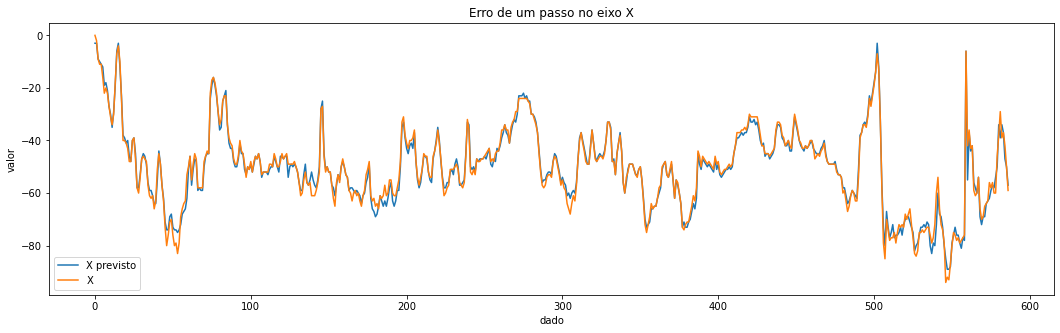

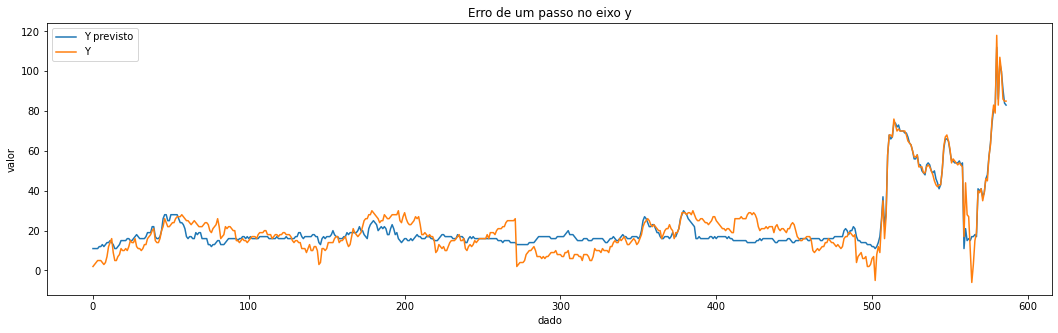

In [25]:
arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y,Z=[],[],[]
Xh,Yh,Zh=[],[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Erro antes do treinamento")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()


__________________ TREINAMENTO 1____________________________________________________
Dados de treinamento criados a partir do arquivo dados.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 591
....................
Epoca: 1000 Time: 0.2min ->Neuronios atualizados, erro atual: 0.0001532325695734471 acuracia: 99.92616688163278
....................
Epoca: 2000 Time: 0.4min ->Neuronios atualizados, erro atual: 0.00015293789329007268 acuracia: 99.92628265761722
....................
Epoca: 3000 Time: 0.6min ->Neuronios atualizados, erro atual: 0.00015280174557119608 acuracia: 99.92626466714253
....................
Epoca: 4000 Time: 0.8min ->Neuronios atualizados, erro atual: 0.00015248794807121158 acuracia: 99.9264418752685
....................
Epoca: 5000 Time: 1.1min ->Neuronios atualizados, erro atual: 0.00015219756460282952 acuracia: 99.92660038818872
....................
Epoca: 6000 Time: 1.3min ->Neuronios atualizados, erro atual: 0.00015190198610071093 acuracia:

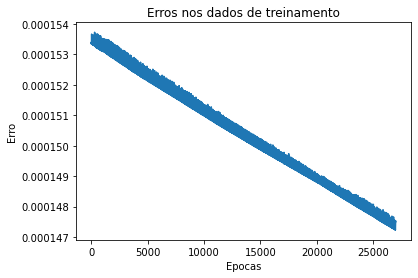

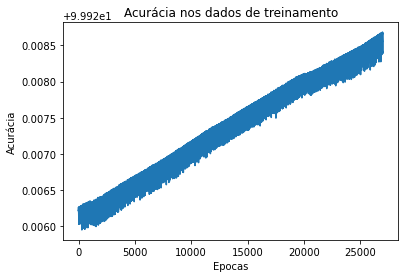

O modelo foi capaz de aprender até a epoca 26000 para a taxa de aprendizado de 0.1
Dados de treinamento criados a partir do arquivo dados.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 591
....................
Epoca: 1000 Time: 0.2min ->Neuronios atualizados, erro atual: 0.00014727724192198366 acuracia: 99.92864459072105
....................
Epoca: 2000 Time: 0.4min ->Neuronios atualizados, erro atual: 0.00014712891425006092 acuracia: 99.92871244929134
....................
Epoca: 3000 Time: 0.6min ->Neuronios atualizados, erro atual: 0.00014696005382575095 acuracia: 99.9288000668851
....................
Epoca: 4000 Time: 0.9min ->Neuronios atualizados, erro atual: 0.00014681181346531957 acuracia: 99.92886857818002
....................
Epoca: 5000 Time: 1.1min ->Neuronios atualizados, erro atual: 0.00014668022049590945 acuracia: 99.92892681655448
....................
Epoca: 6000 Time: 1.3min ->Neuronios atualizados, erro atual: 0.00014654872938990593 acuracia: 

....................
Epoca: 61000 Time: 13.7min ->Neuronios atualizados, erro atual: 0.0001378481974825263 acuracia: 99.93238410719908
....................
Epoca: 62000 Time: 13.9min ->Neuronios atualizados, erro atual: 0.0001376135478494689 acuracia: 99.93245861388652
....................
Epoca: 63000 Time: 14.1min ->Neuronios atualizados, erro atual: 0.0001373947598040104 acuracia: 99.93251846357849
....................
Epoca: 64000 Time: 14.4min ->Neuronios atualizados, erro atual: 0.000137156224809587 acuracia: 99.93258040035857
....................
Epoca: 65000 Time: 14.6min ->Neuronios atualizados, erro atual: 0.00013692030915990472 acuracia: 99.93266024001778
....................
Epoca: 66000 Time: 14.8min ->Neuronios atualizados, erro atual: 0.00013666748418472707 acuracia: 99.93278043247105
....................
Epoca: 67000 Time: 15.0min ->Neuronios atualizados, erro atual: 0.00013644724094774574 acuracia: 99.93286385021595
....................
Epoca: 68000 Time: 15.3min ->Neu

KeyboardInterrupt: 

In [26]:
print("__________________ TREINAMENTO 1____________________________________________________")

tic=time.time()
Epocas=100000
Aprendizado=0.1000
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"dados.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))
    Aprendizado=Aprendizado-0.025

print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" minutos")

Dados de treinamento criados a partir do arquivo dados.txt
Tamanho das entradas: 105
Tamanho das saídas: 2
Quantidade de dados: 591


<ipython-input-27-732bfc5ef857>:12: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saida=transformarSaida(yh0)//1
<ipython-input-27-732bfc5ef857>:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  saidaEsperada=transformarSaida(y0)//1


Testando X


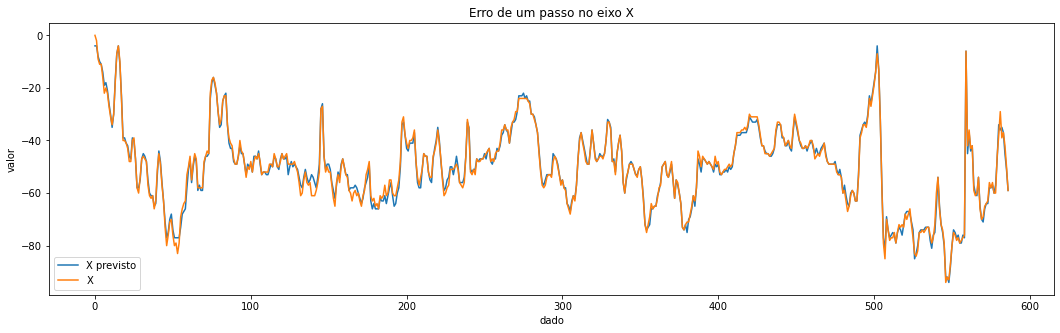

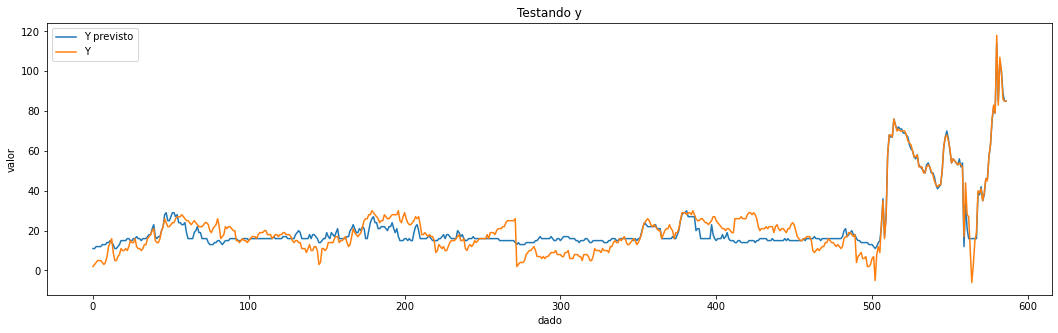

In [27]:
arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Testando X")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Testando y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:
print("__________________ TREINAMENTO 2____________________________________________________")

tic=time.time()
Epocas=1000
Aprendizado=0.1
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"dados.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))
    Aprendizado=Aprendizado-0.01

print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")

In [ ]:
arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Testando X")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Testando y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:
print("__________________ TREINAMENTO 3____________________________________________________")

tic=time.time()
Epocas=1000
Aprendizado=0.01
while(Aprendizado>0):
    roboQuadrupede.load_state_dict(torch.load("parametrosRedePreditiva.pt"))
    roboQuadrupede.eval()
    qEpocas,roboQuadrupede=treinamento(Epocas,roboQuadrupede,Aprendizado,"dados.txt","parametrosRedePreditiva.pt","erroPreditiva.txt","acuraciaPreditiva.txt")
    print("O modelo foi capaz de aprender até a epoca "+str(qEpocas)+" para a taxa de aprendizado de "+ str(Aprendizado))
    Aprendizado=Aprendizado-0.001

print("O treinamento levou "+str(((time.time()-tic)//6)/10)+" segundos")

In [ ]:
arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Testando X")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Testando y")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:
arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]
for k in range(len(xTrainEscolhido)-1):
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)//1
    saidaEsperada=transformarSaida(y0)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
#     Z.append(saidaEsperada[2])
    
    Xh.append(saida[0])
    Yh.append(saida[1])
#     Zh.append(saida[2])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
print("Testando X")
plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X - Dados de Teste")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo Y - Dados de Teste")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:
#define Criar código que testa 2 pontos a frente

arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]

print("Calculando ...")
for k in range(len(xTrainEscolhido)-2):


# for k in range(2):
    
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)
    saidaEsperada=transformarSaida(y0)
#     X.append(saidaEsperada[0])
#     Y.append(saidaEsperada[1])

    

    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
    
    
#     print("Calculando passo 2: ")
    xTrain=xTrainEscolhido[k+1].numpy()
#     print("Entrada:")
#     print(xTrain)
#     print((xTrain[32]))
#     print(xTrain[33])
    
    xTrain[32]=saida[0]
    xTrain[33]=saida[1]
#     print(xTrain)
    
    x1=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()#testeval
    y1=torch.from_numpy(np.array(yTrainEscolhido[k+1],dtype=np.float)).float()#testeval
    
    yh1=roboQuadrupede.forward(x1)
    
    saida=transformarSaida(yh1)//1
    saidaEsperada=transformarSaida(y1)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
    Xh.append(saida[0])
    Yh.append(saida[1])
    

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X - Dados de treinamento")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo Y - Dados de treinamento")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:
#define Criar código que testa 2 pontos a frente

arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]

print("Calculando ...")
for k in range(len(xTrainEscolhido)-2):


# for k in range(2):
    
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)
    saidaEsperada=transformarSaida(y0)
#     X.append(saidaEsperada[0])
#     Y.append(saidaEsperada[1])

    

    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
    
    
#     print("Calculando passo 2: ")
    xTrain=xTrainEscolhido[k+1].numpy()
#     print("Entrada:")
#     print(xTrain)
#     print((xTrain[32]))
#     print(xTrain[33])
    
    xTrain[32]=saida[0]
    xTrain[33]=saida[1]
#     print(xTrain)
    
    x1=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()#testeval
    y1=torch.from_numpy(np.array(yTrainEscolhido[k+1],dtype=np.float)).float()#testeval
    
    yh1=roboQuadrupede.forward(x1)
    
    saida=transformarSaida(yh1)//1
    saidaEsperada=transformarSaida(y1)//1
    X.append(saidaEsperada[0])
    Y.append(saidaEsperada[1])
    Xh.append(saida[0])
    Yh.append(saida[1])
    

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X - Dados de treinamento")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo Y - Dados de treinamento")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:
#define Criar código que testa 3 pontos a frente

arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]

print("Calculando ...")
for k in range(len(xTrainEscolhido)-3):


# for k in range(1):
    
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)
    saidaEsperada=transformarSaida(y0)
#     X.append(saidaEsperada[0])
#     Y.append(saidaEsperada[1])
    
    
    xTrain2=xTrainEscolhido[k+2].numpy()
    
#     Xh.append(saida[0])
#     Yh.append(saida[1])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
    
    
#     print((xTrain[67]))
#     print(xTrain[68])
    xTrain2[67]=saida[0]
    xTrain2[68]=saida[1]
    
#     print("Calculando passo 2: ")
    xTrain=xTrainEscolhido[k+1].numpy()
#     print("Entrada:")
#     print(xTrain)

    
    xTrain[32]=saida[0]
    xTrain[33]=saida[1]
#     print(xTrain)
    
    x1=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()#testeval
    y1=torch.from_numpy(np.array(yTrainEscolhido[k+1],dtype=np.float)).float()#testeval
    
    yh1=roboQuadrupede.forward(x1)
    
    saida=transformarSaida(yh1)
    saidaEsperada=transformarSaida(y1)

    
#     print("Entrada:")
#     print(xTrain)
#     print((xTrain[32]))
#     print(xTrain[33])


#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
    

    
    xTrain2[32]=saida[0]
    xTrain2[33]=saida[1]
#     print(xTrain2)

    x2=torch.from_numpy(np.array(xTrain2,dtype=np.float)).float()#testeval
    y2=torch.from_numpy(np.array(yTrainEscolhido[k+2],dtype=np.float)).float()#testeval
    
    yh2=roboQuadrupede.forward(x2)
    
    saida=transformarSaida(yh2)
    saidaEsperada=transformarSaida(y2)
    
    X.append(saidaEsperada[0].item())
    Y.append(saidaEsperada[1].item())
    
    Xh.append(saida[0].item())
    Yh.append(saida[1].item())
#     print(saida)
#     print(saidaEsperada)

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X - Dados de treinamento")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo Y - Dados de treinamento")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:
#define Criar código que testa 3 pontos a frente

arq="dados.txt"
xTrainEscolhido,yTrainEscolhido=gerarDadosTrain(arq)


X,Y=[],[]
Xh,Yh=[],[]

print("Calculando ...")
for k in range(len(xTrainEscolhido)-3):


# for k in range(1):
    
    x0=torch.from_numpy(np.array(xTrainEscolhido[k],dtype=np.float)).float()#testeval
    y0=torch.from_numpy(np.array(yTrainEscolhido[k],dtype=np.float)).float()#testeval
    yh0=roboQuadrupede.forward(x0)
    
    saida=transformarSaida(yh0)
    saidaEsperada=transformarSaida(y0)
#     X.append(saidaEsperada[0])
#     Y.append(saidaEsperada[1])
    
    
    xTrain2=xTrainEscolhido[k+2].numpy()
    
#     Xh.append(saida[0])
#     Yh.append(saida[1])
    
#     print("Entrada:")
#     print(x0)
#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
    
    
#     print((xTrain[67]))
#     print(xTrain[68])
    xTrain2[67]=saida[0]
    xTrain2[68]=saida[1]
    
#     print("Calculando passo 2: ")
    xTrain=xTrainEscolhido[k+1].numpy()
#     print("Entrada:")
#     print(xTrain)

    
    xTrain[32]=saida[0]
    xTrain[33]=saida[1]
#     print(xTrain)
    
    x1=torch.from_numpy(np.array(xTrain,dtype=np.float)).float()#testeval
    y1=torch.from_numpy(np.array(yTrainEscolhido[k+1],dtype=np.float)).float()#testeval
    
    yh1=roboQuadrupede.forward(x1)
    
    saida=transformarSaida(yh1)
    saidaEsperada=transformarSaida(y1)

    
#     print("Entrada:")
#     print(xTrain)
#     print((xTrain[32]))
#     print(xTrain[33])


#     print("Saída Esperada:")
#     print(saidaEsperada)
#     print("Saída:")
#     print(saida)
    

    
    xTrain2[32]=saida[0]
    xTrain2[33]=saida[1]
#     print(xTrain2)

    x2=torch.from_numpy(np.array(xTrain2,dtype=np.float)).float()#testeval
    y2=torch.from_numpy(np.array(yTrainEscolhido[k+2],dtype=np.float)).float()#testeval
    
    yh2=roboQuadrupede.forward(x2)
    
    saida=transformarSaida(yh2)//1
    saidaEsperada=transformarSaida(y2)//1
    
    X.append(saidaEsperada[0].item())
    Y.append(saidaEsperada[1].item())
    
    Xh.append(saida[0].item())
    Yh.append(saida[1].item())
#     print(saida)
#     print(saidaEsperada)

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo X - Dados de Teste")
plt.plot(Xh,label="X previsto")
plt.plot(X,label="X")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

plt.figure(figsize=[18,5])
plt.title("Erro de um passo no eixo Y - Dados de Teste")
plt.plot(Yh,label="Y previsto")
plt.plot(Y,label="Y")
plt.xlabel("dado")
plt.ylabel("valor")
plt.legend()
plt.show()

# plt.figure(figsize=[18,5])
# plt.title("Erro de um passo no eixo Z")
# plt.plot(Zh,label="Z previsto")
# plt.plot(Z,label="Z")
# plt.xlabel("dado")
# plt.ylabel("valor")
# plt.legend()
# plt.show()

In [ ]:


def extrairComandos(indice,dados):
    DADOS_I_0=dados[indice]


    return DADOS_I_0[0:12],DADOS_I_0[12:24],DADOS_I_0[24:27],DADOS_I_0[27:30],DADOS_I_0[30],DADOS_I_0[31],DADOS_I_0[34]
    
def construirProximaEntrada(EM,CM,Gy,Ac,Temp,HSR,X,Y,Z):
    entrada=[]
    
    for k in EM:
        entrada.append(k)
    for k in CM:
        entrada.append(k)
    for k in Gy:
        entrada.append(k)
    for k in Ac:
        entrada.append(k)
    
    entrada.append(Temp)
    entrada.append(HSR)
    entrada.append(X)
    entrada.append(Y)
    entrada.append(Z)
    
    return entrada

def calcularErroPropagado(vetorPrevisto, vetorEsperado):
    variacao=np.array(vetorPrevisto)-np.array(vetorEsperado)
    
    erro=[]
    erroAcumulado=0
    
    for v in variacao:
        erroAcumulado=erroAcumulado+np.abs(v.item())
        erro.append(erroAcumulado)
       
    
    return np.array(erro)
   
    
def teste(modelo,arquivo,Q):
    import random
    xTeste,yTeste=gerarDadosTrain(arquivo)
    tamanhoVetorTeste=len(xTeste)
    indice = random.randint(0,tamanhoVetorTeste-1)

    print("Amostra sorteada: "+str(indice))
    if((tamanhoVetorTeste-indice-1)<Q):
        Q=tamanhoVetorTeste-indice-1

    posicaoInicialRobo=xTeste[indice]
    print("___________________________________________Condições Inicial__________________________________________________________")
    
    DADOS_I_0=np.array(posicaoInicialRobo[0:35])
    DADOS_I_1=np.array(posicaoInicialRobo[35:70])
    DADOS_I_2=np.array(posicaoInicialRobo[70:105])

    
    print("Posicao dos motores: ")
    print(DADOS_I_0[0:12])
    print("Comando dado aos motores: ")
    print(DADOS_I_0[12:24])
    print("Giroscópio(GyX, GyY, GyZ): ")
    print(DADOS_I_0[24:27])
    print("Acelerometro(AcX, AcY, AcZ): ")
    print(DADOS_I_0[27:30])

    print("Temperatura[i-2]: ")
    print(DADOS_I_0[30])

    print("Ultrassonico[i-2]: ")
    print(DADOS_I_0[31])

    print("Inclinação(x,y,z)[i-2]: ")
    print(DADOS_I_0[32:35])
    
 
    Xh,Yh=[],[]
    X, Y=[],[]
    
    Xh.append(DADOS_I_0[32])
    Yh.append(DADOS_I_0[33])
#     Zh.append(DADOS_I_0[34])

    X.append(DADOS_I_0[32])
    Y.append(DADOS_I_0[33])
#     Z.append(DADOS_I_0[34])
    
    while(indice<(tamanhoVetorTeste-1)):

        entrada=[]
        
        for k in DADOS_I_0:
            entrada.append(k)
        for k in DADOS_I_1:
            entrada.append(k)
        for k in DADOS_I_2:
            entrada.append(k)
        
        
        E=torch.from_numpy(np.array(entrada,dtype=np.float)).float()#testeval
        S=modelo.forward(E)
        
        
        vetorPrevisto=transformarSaida(S)
        saidaEsperada=transformarSaida(yTeste[indice])
        
#         EM=vetorPrevisto[0:12]
#         Gy=vetorPrevisto[12:15]
#         Ac=vetorPrevisto[15:18]
#         Temp=vetorPrevisto[18]
#         HSR=vetorPrevisto[19]
#         XP=vetorPrevisto[20]
#         YP=vetorPrevisto[21]
#         ZP=vetorPrevisto[22]


        XP=vetorPrevisto[0]
        YP=vetorPrevisto[1]
#         ZP=vetorPrevisto[2]
        
        EM,CM,Gy,Ac,Temp,HSR,Z=extrairComandos((indice+1),xTeste)
        
        DADOS_I_2=DADOS_I_1
        DADOS_I_1=DADOS_I_0
        DADOS_I_0=construirProximaEntrada(EM,CM,Gy,Ac,Temp,HSR,XP,YP,Z)
        
        
        XR=saidaEsperada[0]
        YR=saidaEsperada[1]
#         ZR=saidaEsperada[2]
#         print(XR.item(),XP.item())
        
        Xh.append(XP)
        Yh.append(YP)
#         Zh.append(ZP)
        
        X.append(XR)
        Y.append(YR)
#         Z.append(ZR)
        
        indice=indice+1
    
    
    
#     plt.figure(figsize=[18,5])   
#     plt.title("X,y,z") 
#     plt.plot(Xh,label="X previsto",c='r')
#     plt.plot(X,label="X Real",c='r')
#     plt.plot(Yh,label="Y previsto",c='g')
#     plt.plot(Y,label="Y Real",c='g')
#     plt.plot(Zh,label="Z previsto",c='b')
#     plt.plot(Z,label="Z Real",c='b')
#     plt.xlim([0,Q])
#     plt.legend()
#     plt.show()


    plt.figure(figsize=[18,5])   
    plt.title("X,Y")
    plt.plot(Xh+180,label="X previsto")
    plt.plot(X,label="X Real")
    plt.xlim([0, Q])
    plt.legend()
    plt.show()
    
    plt.figure(figsize=[18,5])   
    plt.title("Y")
    plt.plot(Yh+180,label="Y previsto")
    plt.plot(Y,label="Y Real")
    plt.xlim([0, Q])
    plt.legend()
    plt.show() 
    
#     plt.figure(figsize=[18,5])   
#     plt.title("Z")
#     plt.plot(Zh,label="Z previsto")
#     plt.plot(Z,label="Z Real")
#     plt.xlim([0, Q])
#     plt.legend()
#     plt.show()
    
    erroX=calcularErroPropagado(X,Xh)
    erroY=calcularErroPropagado(Y,Yh)
#     erroZ=calcularErroPropagado(Z,Zh)
    
    erro=(erroX+erroY)/2
    

    
    
    return erro


In [ ]:
passos = 10# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 15# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 15# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 30# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()


In [ ]:
passos = 1000# quantidade de passos que pretendo prever

erro=teste(roboQuadrupede,"dados.txt",passos)
plt.figure(figsize=[18,5])   
plt.title("erro")
plt.plot(erro)
plt.ylabel("Erro de previsão em graus")
plt.xlabel("Passos na frente")
plt.xlim([0, passos])
plt.show()

In [ ]:
print("Teste")

https://www.repositorio.ufop.br/bitstream/123456789/16214/4/DISSERTA%C3%87%C3%83O_Aplica%C3%A7%C3%A3oAprendizadoRefor%C3%A7o.pdf